## Regression
#### Below we generate a father-son height data set to mirror the dataset collected by Karl Pearson (building on work by Francis Galton).

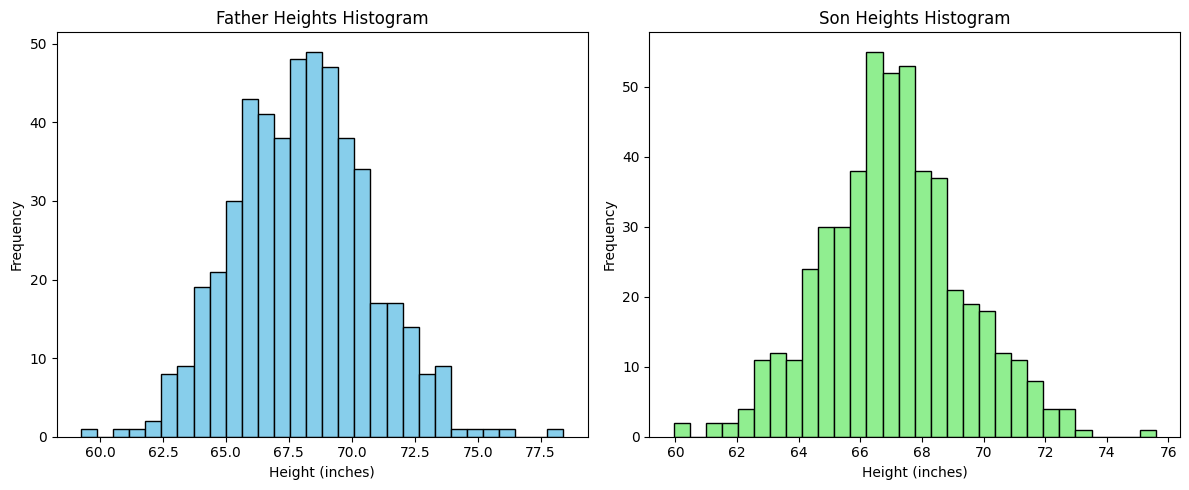


Summary for Fathers:
Mean: 68.02
Median: 68.03
Std Dev: 2.65
Min: 59.25
1Q: 66.11
Median: 68.03
3Q: 69.72
Max: 78.40

Summary for Sons:
Mean: 67.07
Median: 66.99
Std Dev: 2.28
Min: 59.94
1Q: 65.64
Median: 66.99
3Q: 68.43
Max: 75.59


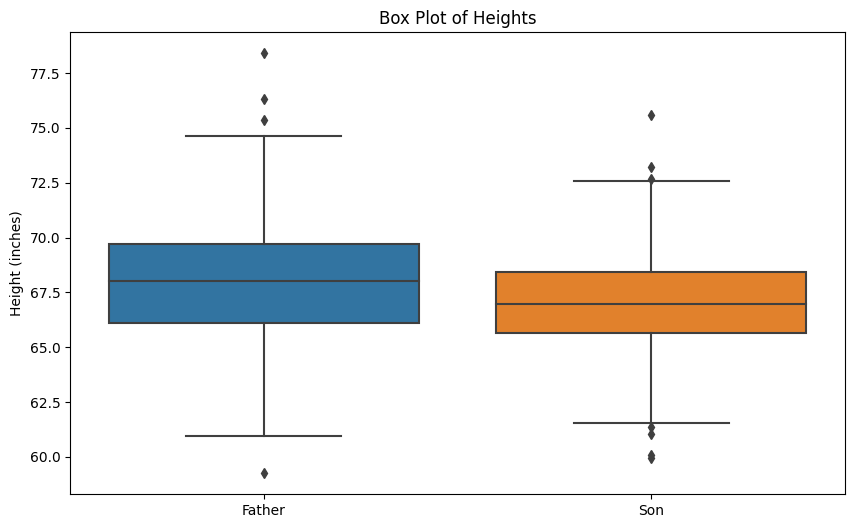

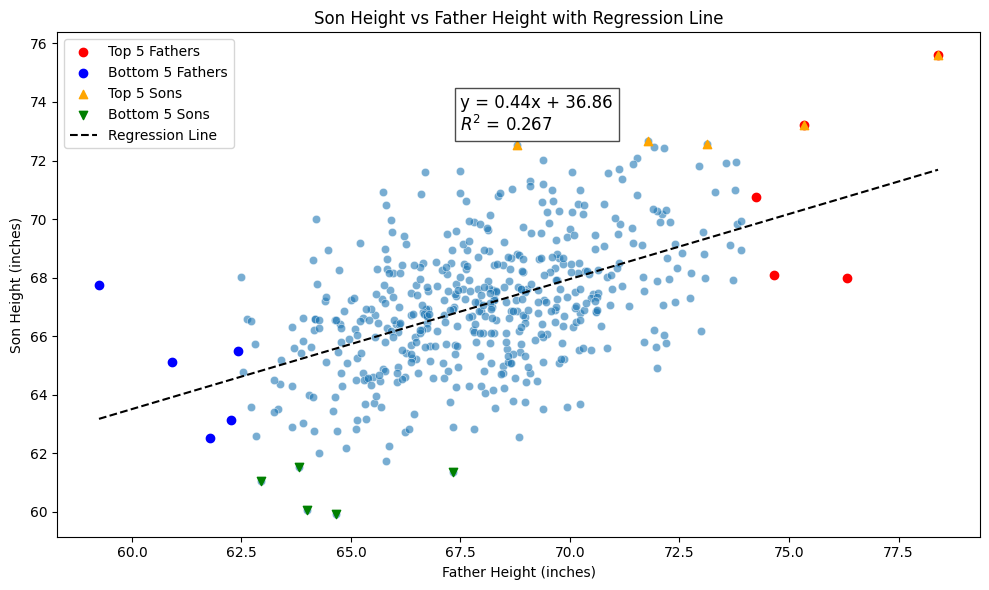

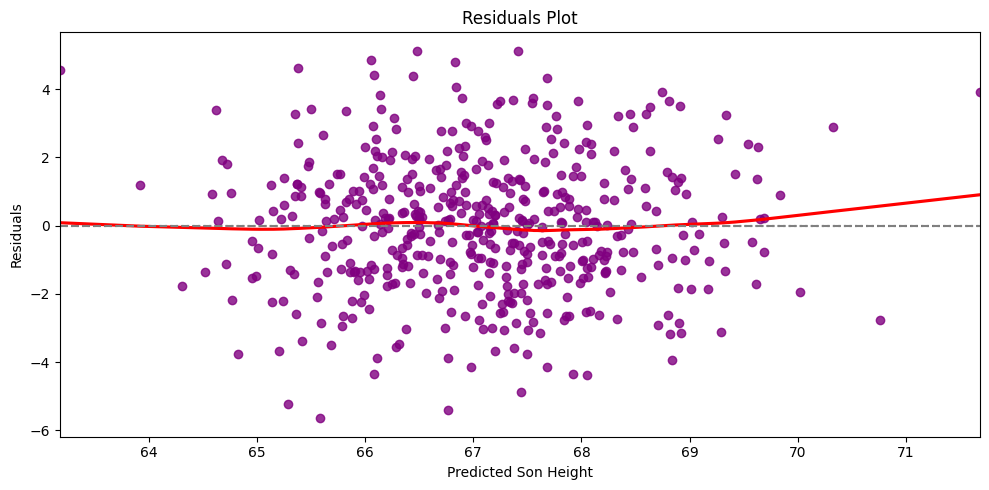

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# -------------------------------
# Step 1: Generate Synthetic Data
# -------------------------------
np.random.seed(42)

# Simulate fathers' heights (in inches), roughly normal
father_heights = np.random.normal(loc=68, scale=2.7, size=500)  # mean 68", std 2.7"

# Simulate sons' heights with correlation to father's height
noise = np.random.normal(loc=0, scale=2, size=500)
son_heights = 0.5 * father_heights + 33 + noise  # linear relationship with some noise

# Combine into DataFrame
df = pd.DataFrame({
    'Father': father_heights,
    'Son': son_heights
})

# -------------------------------
# Step 2: Histogram Plots
# -------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Father'], bins=30, color='skyblue', edgecolor='black')
plt.title('Father Heights Histogram')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Son'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Son Heights Histogram')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# -------------------------------
# Step 3: Summary Statistics
# -------------------------------
def summarize(series, label):
    print(f"\nSummary for {label}:")
    print(f"Mean: {series.mean():.2f}")
    print(f"Median: {series.median():.2f}")
    print(f"Std Dev: {series.std():.2f}")
    print(f"Min: {series.min():.2f}")
    print(f"1Q: {series.quantile(0.25):.2f}")
    print(f"Median: {series.median():.2f}")
    print(f"3Q: {series.quantile(0.75):.2f}")
    print(f"Max: {series.max():.2f}")

summarize(df['Father'], "Fathers")
summarize(df['Son'], "Sons")

# -------------------------------
# Step 4: Box Plot Comparison
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Father', 'Son']])
plt.title('Box Plot of Heights')
plt.ylabel('Height (inches)')
plt.show()

# -------------------------------
# Step 5: Scatter Plot with Highlights
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Father', y='Son', data=df, alpha=0.6)

# Highlight extremes
top_fathers = df.nlargest(5, 'Father')
bottom_fathers = df.nsmallest(5, 'Father')
top_sons = df.nlargest(5, 'Son')
bottom_sons = df.nsmallest(5, 'Son')

plt.scatter(top_fathers['Father'], top_fathers['Son'], color='red', label='Top 5 Fathers')
plt.scatter(bottom_fathers['Father'], bottom_fathers['Son'], color='blue', label='Bottom 5 Fathers')
plt.scatter(top_sons['Father'], top_sons['Son'], color='orange', label='Top 5 Sons', marker='^')
plt.scatter(bottom_sons['Father'], bottom_sons['Son'], color='green', label='Bottom 5 Sons', marker='v')

# Regression line
model = LinearRegression()
model.fit(df[['Father']], df['Son'])

x_vals = np.linspace(df['Father'].min(), df['Father'].max(), 100)
x_df = pd.DataFrame(x_vals, columns=['Father'])  # <- fix
y_vals = model.predict(x_df)

# Plot regression line
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Regression Line')

# Annotate equation and R²
eqn = f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.3f}"
plt.text(67.5, 73, eqn, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.title('Son Height vs Father Height with Regression Line')
plt.xlabel('Father Height (inches)')
plt.ylabel('Son Height (inches)')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Residuals Plot
# -------------------------------
residuals = df['Son'] - predictions
plt.figure(figsize=(10, 5))
sns.residplot(x=predictions, y=residuals, lowess=True, color="purple", line_kws={'color': 'red'})
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Son Height')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()